# [3D] Hindmarsh Rose Model

In [5]:
import brainpy as bp

bp.math.enable_x64()
bp.math.set_platform('cpu')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class HindmarshRose(bp.DynamicalSystem):
  def __init__(self, method='exp_auto'):
    super(HindmarshRose, self).__init__()

    # parameters
    self.a = 1.
    self.b = 2.5
    self.c = 1.
    self.d = 5.
    self.s = 4.
    self.x_r = -1.6
    self.r = 0.001

    # variables
    self.x = bp.math.Variable(bp.math.ones(1))
    self.y = bp.math.Variable(bp.math.ones(1))
    self.z = bp.math.Variable(bp.math.ones(1))
    self.I = bp.math.Variable(bp.math.zeros(1))

    # integral functions
    def dx(x, t, y, z, Isyn):
      return y - self.a * x ** 3 + self.b * x * x - z + Isyn

    def dy(y, t, x):
      return self.c - self.d * x * x - y

    def dz(z, t, x):
      return self.r * (self.s * (x - self.x_r) - z)

    self.int_x = bp.odeint(f=dx, method=method)
    self.int_y = bp.odeint(f=dy, method=method)
    self.int_z = bp.odeint(f=dz, method=method)

  def update(self, _t, _dt):
    self.x.value = self.int_x(self.x, _t, self.y, self.z, self.I, _dt)
    self.y.value = self.int_y(self.y, _t, self.x, _dt)
    self.z.value = self.int_z(self.z, _t, self.x, _dt)
    self.I[:] = 0.

## Simulation

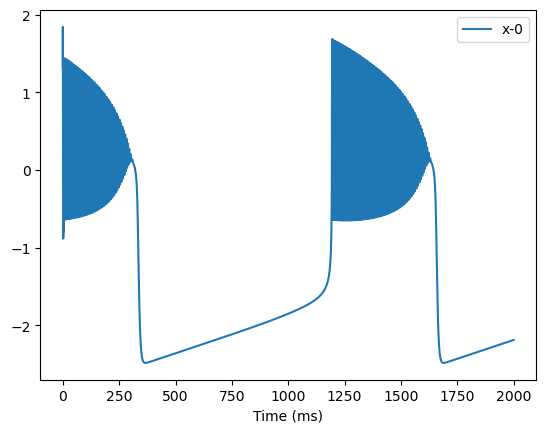

In [7]:
model = HindmarshRose()

runner = bp.StructRunner(model, monitors=['x', 'y', 'z'], inputs=['I', 1.5])
runner.run(2000.)
bp.visualize.line_plot(runner.mon.ts, runner.mon.x, legend='x', show=True)

## Bifurcation analysis

I am making bifurcation analysis ...
I am filtering out fixed point candidates with auxiliary function ...
I am trying to find fixed points by optimization ...
	There are 7000 candidates
I am trying to filter out duplicate fixed points ...
	Found 813 fixed points.
I am plot trajectory ...


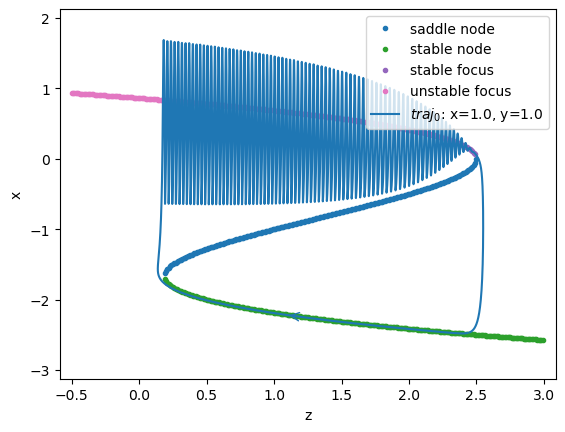

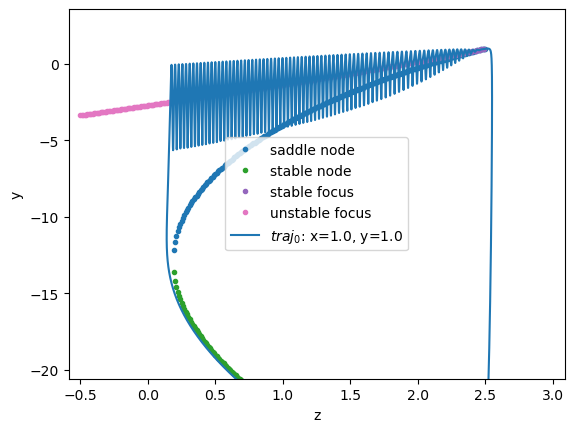

In [8]:
analyzer = bp.analysis.FastSlow2D(
    [model.int_x, model.int_y, model.int_z],
    fast_vars={'x': [-3, 2], 'y': [-20., 3.]},
    slow_vars={'z': [-0.5, 3.]},
    pars_update={'Isyn': 1.5},
    resolutions={'z': 0.01},
    # options={bp.analysis.C.y_by_x_in_fy: lambda x: model.c - model.d * x * x}
)
analyzer.plot_bifurcation(num_rank=20)
analyzer.plot_trajectory({'x': [1.], 'y': [1.], 'z': [1.]},
                       duration=1700,
                       plot_durations=[360, 1680])
analyzer.show_figure()

## Phase plane analysis

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2111 candidates
I am trying to filter out duplicate fixed points ...
	Found 1 fixed points.
	#1 x=0.8622883664870418, y=-2.7177061387576664 is a unstable focus.
I am plot trajectory ...


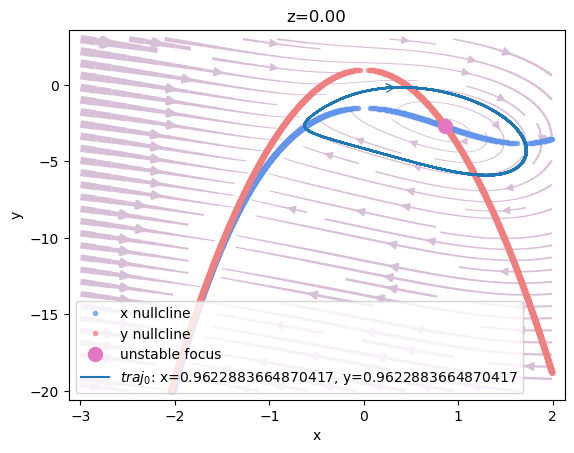

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2141 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-1.8726542833566047, y=-16.534171584258853 is a stable node.
	#2 x=-1.4420338472164373, y=-9.397308139309175 is a saddle node.
	#3 x=0.814685868681862, y=-2.318565180349469 is a unstable focus.
I am plot trajectory ...


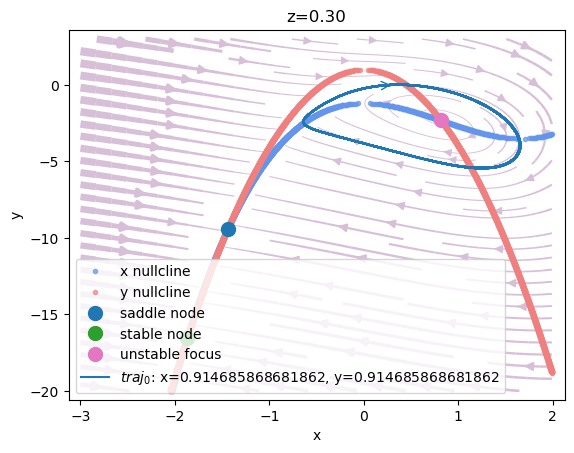

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2171 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.046213240660094, y=-19.934943131130154 is a stable node.
	#2 x=-1.216855528170906, y=-6.4036868487762595 is a saddle node.
	#3 x=0.763068783120809, y=-1.911369835824577 is a unstable focus.
I am plot trajectory ...


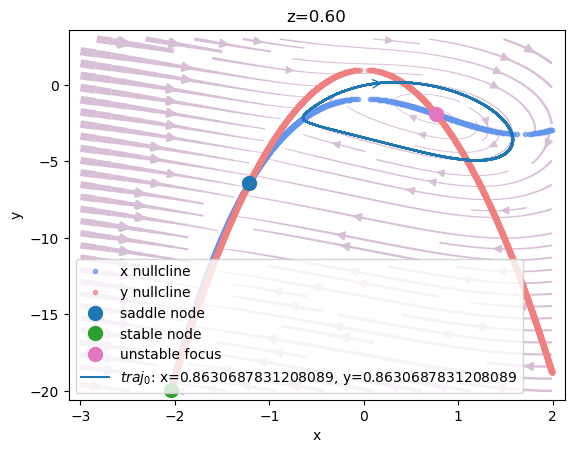

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2201 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.1556926349478034, y=-22.235053679257724 is a stable node.
	#2 x=-1.0507080019671915, y=-4.519936569903868 is a saddle node.
	#3 x=0.706400673022296, y=-1.4950094398974465 is a unstable focus.
I am plot trajectory ...


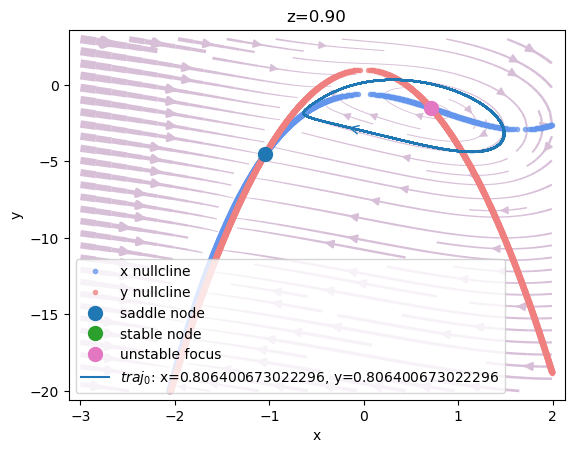

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2231 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.2411861683124963, y=-24.114577206331102 is a stable node.
	#2 x=-0.9019327539758004, y=-3.067413428355747 is a saddle node.
	#3 x=0.6431188901157782, y=-1.0680095250383572 is a unstable focus.
I am plot trajectory ...


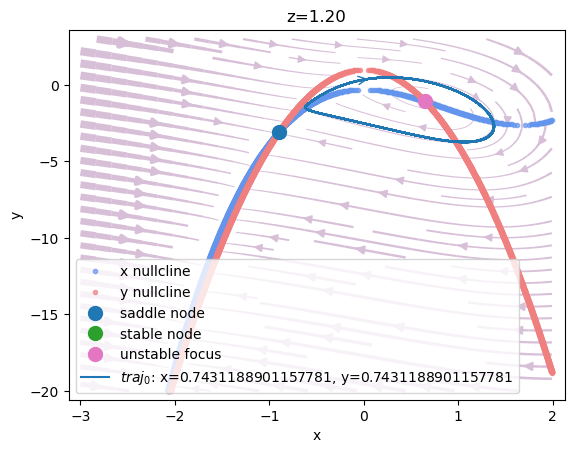

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2261 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.3130990884027187, y=-25.75213708580112 is a stable node.
	#2 x=-0.7575691876779037, y=-1.8695551041907668 is a saddle node.
	#3 x=0.5706681801629563, y=-0.6283107114652485 is a unstable focus.
I am plot trajectory ...


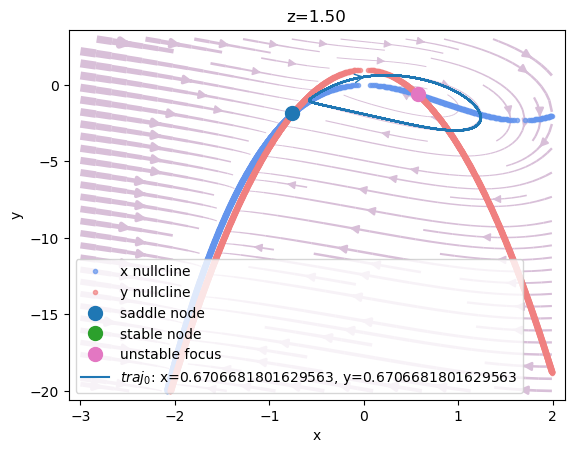

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2291 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.376005265045584, y=-27.227005096799928 is a stable node.
	#2 x=-0.6083082562498872, y=-0.8501946138839175 is a saddle node.
	#3 x=0.4843137237829967, y=-0.17279902824334253 is a unstable focus.
I am plot trajectory ...


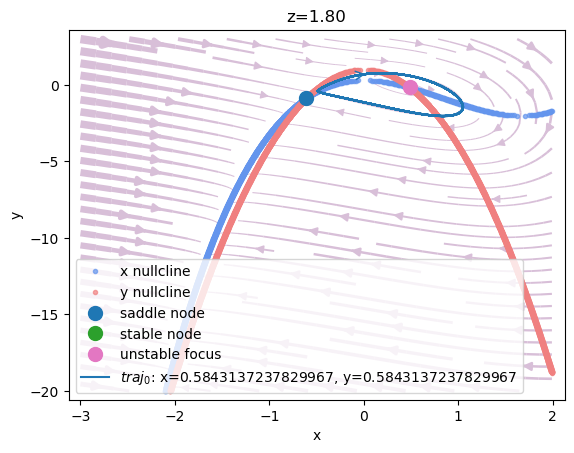

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2321 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.4323928622096576, y=-28.582675180900775 is a stable node.
	#2 x=-0.4407309093826326, y=0.02878141459389016 is a saddle node.
	#3 x=0.37312367222430437, y=0.30389369711344255 is a unstable focus.
I am plot trajectory ...


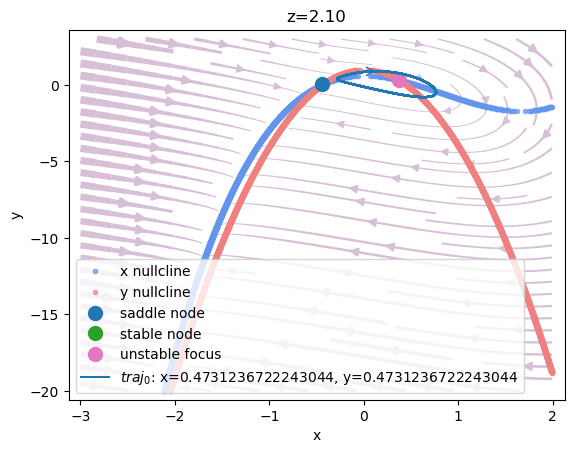

I am computing fx-nullcline ...
I am evaluating fx-nullcline by optimization ...
I am computing fy-nullcline ...
I am evaluating fy-nullcline by optimization ...
I am creating vector fields ...
I am searching fixed points ...
I am trying to find fixed points by optimization ...
	There are 2351 candidates
I am trying to filter out duplicate fixed points ...
	Found 3 fixed points.
	#1 x=-2.4837904744530936, y=-29.846075577137594 is a stable node.
	#2 x=-0.20892019099682427, y=0.7817618139261898 is a saddle node.
	#3 x=0.19271039914787805, y=0.8143135053948519 is a stable focus.
I am plot trajectory ...


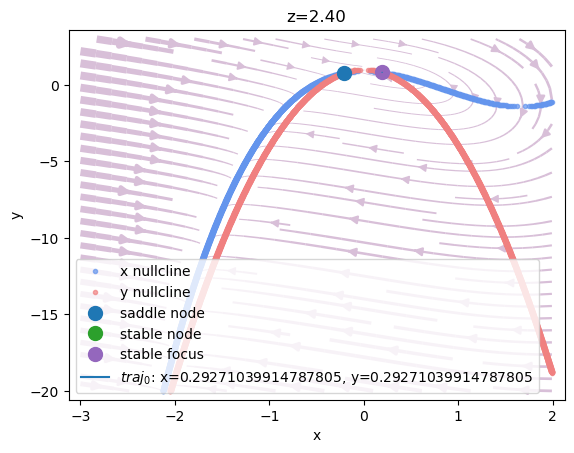

In [9]:
for z in np.arange(0., 2.5, 0.3):
    analyzer = bp.analysis.PhasePlane2D(
      [model.int_x, model.int_y],
      target_vars={'x': [-3, 2], 'y': [-20., 3.]},
      pars_update={'Isyn': 1.5, 'z': z},
      resolutions={'x': 0.01, 'y': 0.01},
    )
    analyzer.plot_nullcline()
    analyzer.plot_vector_field()
    fps = analyzer.plot_fixed_point(with_return=True)
    analyzer.plot_trajectory({'x': [fps[-1, 0] + 0.1], 'y': [fps[-1, 0] + 0.1]},
                             duration=500, plot_durations=[400, 500])
    plt.title(f'z={z:.2f}')
    plt.show()